# The Cyclic Hopfield Network

**NX-465 Mini-project MP2, Spring semester 2025**

## Introduction
The Hopfield network is a classical model that helps us understand how memories are stored and retrieved in neural systems. It operates by associating stored patterns with stable fixed points; if a small error occurs, the system naturally corrects itself by converging back to the correct pattern.
In this project, we will take the Hopfield model a step further. Instead of focusing on the stationary states, we will explore stable limit cycles where the neuronal states evolve over time following a sequence of patterns. You will be implementing this extension with minimal modifications to the classical model and investigate its ability to store and retrieve sequences of patterns. Further, you will also implement the cyclic Hopfield model as a continuous dynamical system, which will be compared to the discrete system and analysed using simple dimensionality reduction techniques.
Note: the project is intended to be solved using Python without the need for any specific library (other than the usual numpy and matplotlib). You are free to use other libraries if you want.
At the bottom of the project you will find a list of resources and references for further reading.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ex 0. Getting Started: Cyclic Hopfield model

We start with a classical Hopfield-like setup, with a network consisting of N neurons with connectivity matrix $\mathbb{w}_{ij}$ . Each neuron i has a continuously-valued state $S_i(t) \in [-1, 1]$, which updates according to
\begin{equation}
	S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)
\tag{1}
\end{equation}
where (n) denotes the iteration number and $\beta$ is the shape parameter of the transfer function. The connectivity matrix will be defined as
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

 where P ≤ N is the number of patterns that make up the connectivity. Unlike in the standard, static Hopfield model, here the patterns are not fixed points of the system, but rather points along a limit cycle. As such this system will be called a cyclic Hopfield model. We will be taking random patterns where each entry per pattern takes on a value $p^{\mu}_i \in \{-1, 1\}$ both with equal probability.

**0.1**. Write a function that generates network patterns as defined above, as a function of P and N.
As in the standard Hopfield model, we can define overlap variables both to better understand the network dynamics as well as to reduce computational complexity. For each pattern $p^{\mu}$ the corresponding overlap
variable is defined as
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}

In [2]:
def network_patterns(P, N):
    """
    Function that generates random network patterns.
    Input: P = number of neurons (int)
           N = number of patterns (int)
    Output: A matrix of size (P, N) where each row is a pattern, and each entry is either -1 or 1. (np.ndarray)
    """
    return np.random.choice([-1, 1], size=(P, N))

**0.2**. Rewrite the right-hand side of equation (1) in terms of the patterns and the overlap variables, making use of Eqs. (2) and (3).

<span style="color:#0A74DA">

$Solution:$
Equation (1) is given by $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)$.
Let's develop the right-hand side. First, replace $\mathbb{w}_{ij}$ using equation (2):
\begin{equation*}
	 \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right] S_j^{(n-1)} \right)=
\end{equation*}

\begin{equation*}
	  \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}[p_i^1 p_j^P]S_j^{(n-1)}+ \beta \sum_{j=1}^{N} \frac{1}{N} [\sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1}] S_j^{(n-1)} \right)
\end{equation*}
Using (3), we obtain: 
\begin{equation*}
	  \operatorname{tanh} \left( \beta \left[m^{P,(n-1)} p_i^{1}+  \sum_{\mu=2}^P m^{\mu-1, (n-1)} p_i^{\mu}\right] \right)
\end{equation*}

Consider finally that $m^{0, (n-1)} = m^{P, (n-1)}$ for cyclic consistency, we obtain:
\begin{equation*}
	 S_i^{(n)} =\operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)
\end{equation*}

Remind that 
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}
Or in our case 
\begin{equation}
	m^{\mu, (n-1)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n-1)}
\tag{3'}
\end{equation}
and
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

**0.3**. Explain (without simulation) why this system can be considered as *cyclic*, by explaining how the network would evolve if the state of all neurons is initialised along pattern 1: $S^{(0)}_i = p^1_i$.

**Hint:**
* For this you may consider an ideal scenario where $\beta$ is sufficiently large such that $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$ and where the different patterns have no overlap between each other: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
* To manually compute the state of the system at iteration 1, first compute the overlap variables $m^{\mu, (0)}$, and combine it with the equation derived in the previous question.
* From this, Eq. (3) can be used to find $m^{\mu, (1)}$. Extrapolate your result to many iterations to answer the question.

<span style="color:#0A74DA">

$Solution:$
If we use the definition of the overlap given by (3), we have
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(0)}
\end{equation*}
By susbtituting $S^{(0)}_i = p^1_i$ in this equation, we obtain
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i p^1_i
\end{equation*}
There is no overlap between different patterns (by hint assumption), which inplies the orthogonality of the stored patterns: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
Therefore, we have
\begin{equation}
\left\{\begin{array}{ll}
	m^{\mu, (0)} =0 \textrm{, for } \mu \neq 1 \\
	m^{1, (0)} =1 \textrm{, otherwise}
\end{array}\right.
\tag{**}
\end{equation}

From the question 0.2, we obtained that $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)$. Therefore, $S_i^{(1)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (0)} p_i^{\mu} \right)$ and if we susbtitute the value of $m^{\mu, (0)}$ previously found, we obtain:
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta m^{0, (0)} p^{1}_i+\beta m^{1, (0)} p^{2}_i + \sum_{\mu=3}^P \beta m^{\mu-1, (0)} p_i^{\mu} \right)
\end{equation*}
which become
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right)
\end{equation*}
using (**). In addition, for large value of $\beta$, $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$. Therefore,
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right) ≈ \operatorname{sign}(p^{2}_i) = p^{2}_i
\end{equation*}
Similarly as $m^{\mu, (0)}$, if we want to compute $m^{\mu, (1)}$ we use the overlap definition and, this time, $S_i^{(1)} = p^{2}_i$:
\begin{equation*}
\left\{\begin{array}{ll}
	m^{\mu, (1)} =0 \textrm{, for } \mu \neq 2 \\
	m^{2, (1)} =1 \textrm{, otherwise}
\end{array}\right.
\end{equation*}

If we repeat many times this process, we will obtain $m^{3, (2)} = 1$ because $S_i^{(2)} = p_i^{3}$, $m^{4, (3)} = 1$ because $S_i^{(3)} = p_i^{4}$, $m^{5, (4)} = 1$ because $S_i^{(4)} = p_i^{5}$, ... and so indefinitely. The pattern is $m^{P, (P-1)} = 1$ because $S_i^{(P-1)} = p_i^{P}$ through the whole cycle, and return at a state $m^{1, (P)} = 1$ because $S_i^{(P)} = p_i^{1}$ at the cycle end.
Therefore, the cycle repeats indefinitely, meaning the system cycles through the stored patterns in order: $p^1$, $p^2$, ..., $p^P$, $p^1$, ...


**0.4**. Verify your prediction from the previous question with a simulation of the more general, non-ideal scenario.

* Generate P = 10 patterns using your implementation from Ex. 0.1.
* Write code that simulates the evolution of the system for N = 100 neurons, $\beta$ = 4, $n_{max}$ = 20 iterations. It will be useful to keep track of both the neural state S and the overlap variables $m^{\mu}$ for every iteration.
* **Important**: Implement the update step according to the update equation derived in Ex 0.2, instead of using Eq. (1) directly. This will strongly reduce the computational complexity and make your simulations run many times faster.
* Create a single plot showing the evolution of the P overlap variables $m^{\mu}$ over iterations, and comment on your findings.


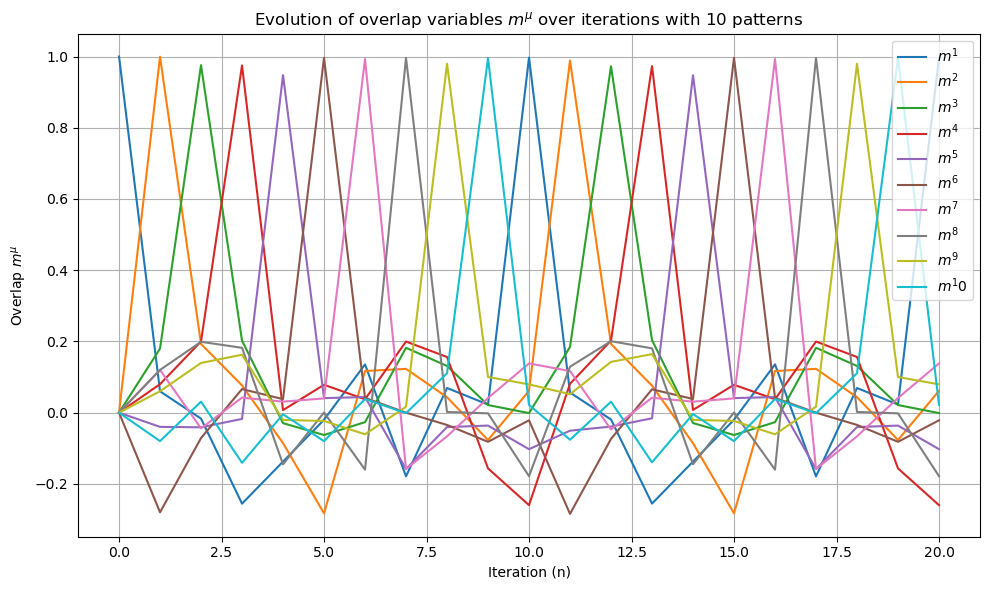

In [3]:
def cyclic_hopfield_model(P=10, N=100, beta=4, n_max=20):
    """
    Run a simulation of a cyclic hopfield model.
    Input:
            P = number of patterns (int)
            N = number of neurons (int)
            beta = shape parameter of the transfer function (float)
            n_max = max number of iterations (int)
    Outpout:
            display the simulation of the cyclic model according to the given parameters
    """
    matrix_patterns = network_patterns(P, N)
    
    S = np.zeros((n_max+1, N)) #neural state = matrix of size(timestep, neural states)
    S[0] = matrix_patterns[0]
    
    overlaps = np.zeros((n_max+1, P)) #overlap = matrix of size(timestep, patterns)
    overlaps[0,0] = 1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)
    #overlap measure the similarity between current state S(n) and the stored pattern p(mu). It is equal to 1 if most correlated, 0 if uncorrelated and -1 if inverted.
    for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                     m = previous_m[mu-1]
                else:
                     m = previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n] = np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])

        #Plot the results
    plt.figure(figsize=(10, 6))
    for mu in range(P):
        plt.plot(overlaps[:, mu], label=f"$m^{mu+1}$")
    plt.title("Evolution of overlap variables $m^\\mu$ over iterations with {} patterns".format(P))
    plt.xlabel("Iteration (n)")
    plt.ylabel("Overlap $m^\\mu$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
cyclic_hopfield_model()

<span style="color:#0A74DA">

Answer:

In the plot, we can distinguish an oscillatory behaviour. In fact, there is a clear cyclic pattern among the overlap values $m^\mu$, particularly for one overlap peaking at each step and then dropping, with another one taking its place.
This indicates that the network is cycling through stored patterns rather than settling into one stable state.
On the graph, we can see that some high peaks on overlaps reach values close to 1. This suggests that at certain iterations, the network strongly resembles one of the stored patterns. This trend continues periodically, suggesting that the network sequentially recalls stored patterns in a loop.
Between peaks, there are non-dominant overlapping patterns that fluctuate around zero, which should indicate some noise or interference, which is expected in a non-ideal scenario (e.g. due to capacity limits, temperature/noise, or non-orthogonal patterns).

## Ex 1. Sequence storage and retrieval

Now that we have a working implementation of the cyclic Hopfield model we can evaluate some of its properties. As in the classical Hopfield network, one of the main properties of interest is the network capacity. We would like to find out how many patterns can be stored in the cycle and still be retrieved. We start by looking at what happens when we increase the number of patterns $P$ in the network.

**1.1**. Redo the simulation of Ex. 0.4 but now with P = 50 patterns. You should observe a clear difference in the dynamics of the overlap variables over iterations, with no clear cyclic behaviour. Why does this happen?

To further investigate where this pattern retrieval breaks down, we need a formal definition of correct behaviour. For this, we say that the cycle is ‘retrieved’ if the network cycles between all patterns in the cycle, in the correct order, when initialised along one of the patterns.

/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_885/3068063892.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


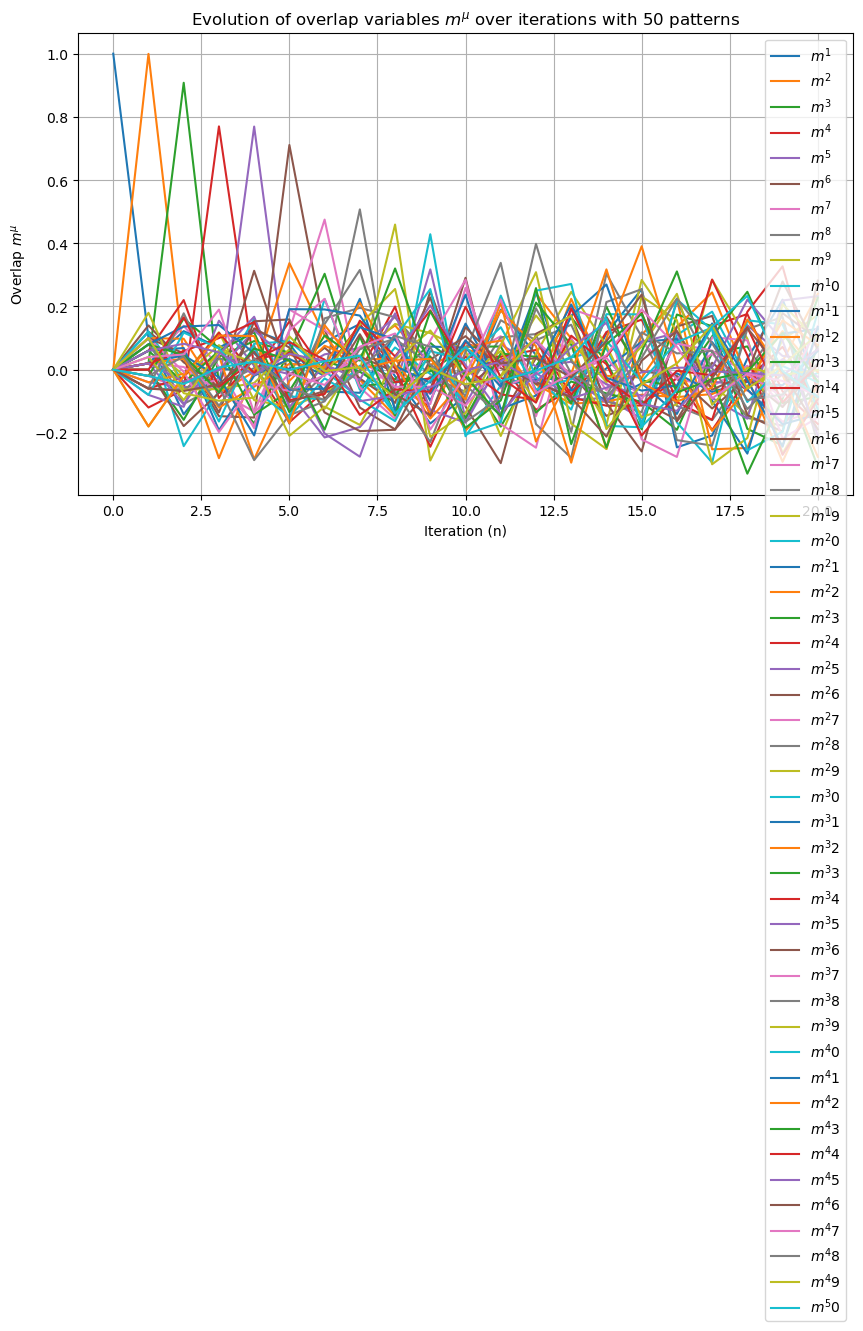

In [4]:
cyclic_hopfield_model(50)

<span style="color:#0A74DA">

Answer:

In deed, there’s no dominant oscillation or clear recall of specific patterns in sequence, in contrast to the previous plot. All the overlaps fluctuate around zero with low amplitudes, and none stand out consistently over time.

In fact, classic hopfield networks have a capacity limit for how many patterns they can store and reliably retrieve.If the number of neurons N  is to modest, the model memory capacity cannot store a lot of patterns. (Here 100 N is to modest for 50 pattern (we have roughly the relationship $P_{max} = 0.138 N$)). 
The consequences of having a too high P according to N can be multiple:
* Interference between stored patterns.
* Cross-talk noise, preventing the system from recalling any one pattern cleanly.
* A lack of stable or cyclic attractors in the energy landscape.

To summary, with 50 stored patterns, the cyclic Hopfield network becomes overloaded, resulting in no clear recall of any pattern over time. The dynamics become chaotic and noisy, as the overlaps $m^\mu$ fluctuate randomly with no dominant memory emerging—highlighting the memory capacity limitations of associative networks.


**1.2**. Implement a way to determine if a cycle has been correctly retrieved in a simulation. 

**Hints:**
* Compute for each iteration the index of the pattern with the largest overlap. What should the sequence of indices look like for a correctly retrieved cycle?
* Checking the retrieval can be done in two ways: Either through a function that can be evaluated at the end of the simulation, or through a check that is run every iteration. The latter can be useful for implementing early stopping of the simulation.

The cycle capacity of the network is defined as the maximum load $\alpha = P/N$ for which the cycle can still be retrieved. Note that due to the randomness of the patterns there is generally no hard boundary between retrieval and non-retrieval. Next we will be computing and comparing the cycle capacity of two networks with different sizes.

In [5]:
#Function that can be evaluated at the end of the simulation
def is_correct_cycle_retrieved(overlaps, start_mu=0, tolerance=0):
    """
    Checks if the system follows the correct cyclic pattern retrieval.

    Parameters:
    - overlaps: np.array of shape (n_max+1, P), overlaps[m, mu] = m^mu at time m
    - start_mu: int, index of the starting pattern (usually 0)
    - tolerance: int, how many mismatches to tolerate before declaring failure

    Returns:
    - bool: True if cycle retrieved correctly, False otherwise
    - List[int]: detected dominant pattern indices over time
    """
    n_steps, P = overlaps.shape
    dominant_indices = np.argmax(overlaps, axis=1)  # pattern with max overlap at each step
    expected_indices = [(start_mu + i) % P for i in range(n_steps)]

    mismatches = sum(d != e for d, e in zip(dominant_indices, expected_indices))
    
    return mismatches <= tolerance, dominant_indices



In [6]:
#New implementation of cyclic_hopfield_model() with no diplay but with check of correct cyclic pattern retrieval
def cyclic_hopfield_model(P=10, N=100, beta=4, n_max=20):
    """
    Run a simulation of a cyclic hopfield model.
    Input:
            P = number of patterns (int)
            N = number of neurons (int)
            beta = shape parameter of the transfer function (float)
            n_max = max number of iterations (int)
    Outpout:
            display the simulation of the cyclic model according to the given parameters
    """
    matrix_patterns = network_patterns(P, N)
    
    S = np.zeros((n_max+1, N)) #neural state = matrix of size(timestep, neural states)
    S[0] = matrix_patterns[0]
    
    overlaps = np.zeros((n_max+1, P)) #overlap = matrix of size(timestep, patterns)
    overlaps[0,0] = 1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)
    #overlap measure the similarity between current state S(n) and the stored pattern p(mu). It is equal to 1 if most correlated, 0 if uncorrelated and -1 if inverted.
    for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                     m = previous_m[mu-1]
                else:
                     m = previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n] = np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])
    
    #Check correct pattern retrieval
    success, dominant_seq = is_correct_cycle_retrieved(overlaps, start_mu=0)
    #print("Cycle retrieved correctly?" , success)
    #print("Detected dominant pattern indices:", dominant_seq)
    return success

#use for P= 10 as question 0.4
retrieved_state = cyclic_hopfield_model(10)
#use for P =50 as question 1.1
retrieved_state = cyclic_hopfield_model(50)

<span style="color:#0A74DA">

We return to the results obtained in questions 0.4 and 1.1 as expected. P =50 shows no cyclic behavior, unlike the case of P =10.

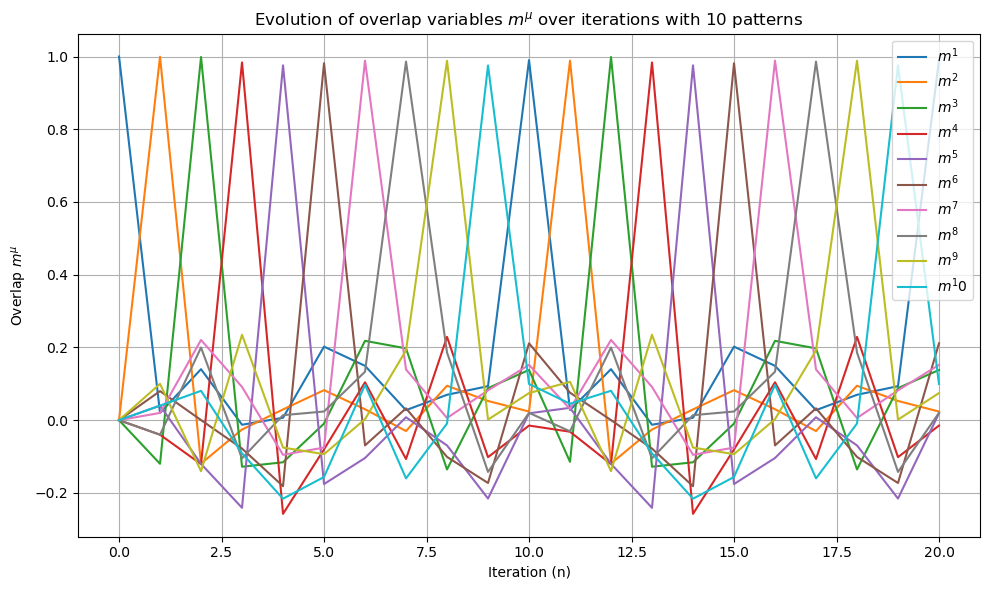

Cycle broken at iteration 7: expected 7, got 1


/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_885/4275268537.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


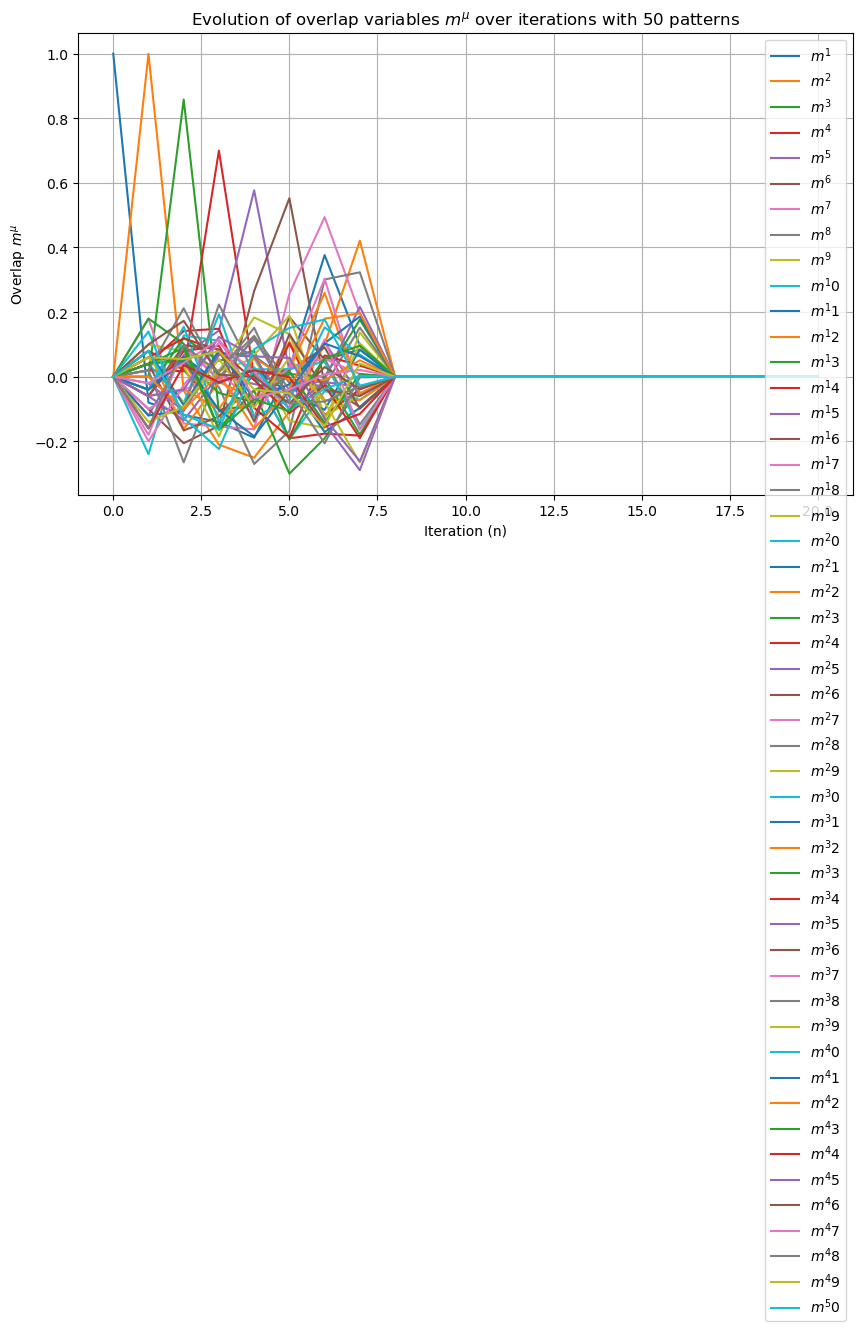

In [7]:
# Version of cyclic_hopfield_model() with integrated check of cyclic retrieval correctness for early stopping
# Per-iteration check of correct cyclic order
def is_cycle_still_correct(dominant_indices, start_mu=0):
    """Returns True if the dominant indices are following the correct cyclic order so far."""
    expected_sequence = [(start_mu + i) % len(dominant_indices) for i in range(len(dominant_indices))]
    return all(dominant_indices[i] == expected_sequence[i] for i in range(len(dominant_indices)))

def cyclic_hopfield_model_early_stopping(P=10, N=100, beta=4, n_max=20):
    """
    Run a simulation of a cyclic hopfield model.
    Input:
            P = number of patterns (int)
            N = number of neurons (int)
            beta = shape parameter of the transfer function (float)
            n_max = max number of iterations (int)
    Outpout:
            display the simulation of the cyclic model according to the given parameters
    """
    matrix_patterns = network_patterns(P, N)
    dominant_indices = [0]  # Track which pattern is dominant at each step
    
    S = np.zeros((n_max+1, N)) #neural state = matrix of size(timestep, neural states)
    S[0] = matrix_patterns[0]
    
    overlaps = np.zeros((n_max+1, P)) #overlap = matrix of size(timestep, patterns)
    overlaps[0,0] = 1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)
    #overlap measure the similarity between current state S(n) and the stored pattern p(mu). It is equal to 1 if most correlated, 0 if uncorrelated and -1 if inverted.
    for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                     m = previous_m[mu-1]
                else:
                     m = previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n] = np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])
                
                
        # Record dominant pattern for this iteration
        dominant_mu = np.argmax(overlaps[n])
        dominant_indices.append(dominant_mu)

        # Check if cycle is correct so far
        expected_sequence = [(0 + i) % P for i in range(len(dominant_indices))]
        if dominant_indices != expected_sequence:
            print(f"Cycle broken at iteration {n}: expected {expected_sequence[n]}, got {dominant_mu}")
            dominant_indices.pop()  # Remove invalid one
            break
    
    
    #Plot the results
    plt.figure(figsize=(10, 6))
    for mu in range(P):
        plt.plot(overlaps[:, mu], label=f"$m^{mu+1}$")
    plt.title("Evolution of overlap variables $m^\\mu$ over iterations with {} patterns".format(P))
    plt.xlabel("Iteration (n)")
    plt.ylabel("Overlap $m^\\mu$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#test with P= 10 as question 0.4
cyclic_hopfield_model_early_stopping(10)
#test with P =50 as question 1.1
cyclic_hopfield_model_early_stopping(50)

<span style="color:#0A74DA">

Again, we obtain similar results to questions 0.4 and 1.1 as expected. P =50 shows no cyclic behavior, unlike the case of P =10.

**1.3**. For $N = 100$ and for $N = 1000$, run a simulation for $\alpha \in \{0.05,0.1,0.15,...,0.4\}$, $n_{max} = 2·P$, with 10 repetitions per $\alpha$ to get a more accurate estimate of the retrieval probability. Produce a single plot showing for both networks the fraction of retrieved cycles as a function of the network load $\alpha$. Roughly what is the cycle capacity for each network?


Running for N = 100
alpha = 0.05, P = 5, Success Rate: 1.00
alpha = 0.10, P = 10, Success Rate: 1.00
alpha = 0.15, P = 15, Success Rate: 1.00
alpha = 0.20, P = 20, Success Rate: 1.00
alpha = 0.25, P = 25, Success Rate: 0.90
alpha = 0.30, P = 30, Success Rate: 0.10
alpha = 0.35, P = 35, Success Rate: 0.00
alpha = 0.40, P = 40, Success Rate: 0.00

Running for N = 1000
alpha = 0.05, P = 50, Success Rate: 1.00
alpha = 0.10, P = 100, Success Rate: 1.00
alpha = 0.15, P = 150, Success Rate: 1.00
alpha = 0.20, P = 200, Success Rate: 1.00
alpha = 0.25, P = 250, Success Rate: 1.00
alpha = 0.30, P = 300, Success Rate: 0.00
alpha = 0.35, P = 350, Success Rate: 0.00
alpha = 0.40, P = 400, Success Rate: 0.00


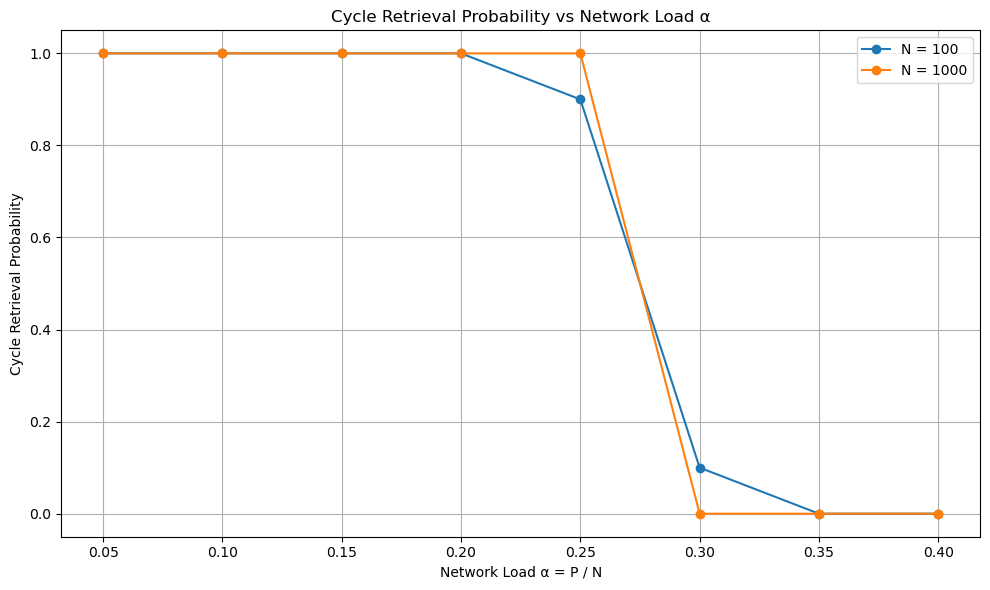

In [8]:
# Run multiple simulations per alpha for two network sizes
def run_capacity_experiment(N_values=[100, 1000], alphas=np.arange(0.05, 0.45, 0.05), n_trials=10):
    beta = 4
    results = {N: [] for N in N_values}

    for N in N_values:
        print(f"\nRunning for N = {N}")
        for alpha in alphas:
            P = int(alpha * N)
            successes = 0
            for trial in range(n_trials):
                if cyclic_hopfield_model(P=P, N=N, beta=beta, n_max=2*P):
                    successes += 1
            retrieval_prob = successes / n_trials
            print(f"alpha = {alpha:.2f}, P = {P}, Success Rate: {retrieval_prob:.2f}")
            results[N].append(retrieval_prob)

    return results, alphas

# Plotting
def plot_results(results, alphas):
    plt.figure(figsize=(10, 6))
    for N, retrievals in results.items():
        plt.plot(alphas, retrievals, marker='o', label=f"N = {N}")
    plt.title("Cycle Retrieval Probability vs Network Load α")
    plt.xlabel("Network Load α = P / N")
    plt.ylabel("Cycle Retrieval Probability")
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the experiment
results, alphas = run_capacity_experiment()
plot_results(results, alphas)

<span style="color:#0A74DA">

Answer:

The graph obtained shows us that the probability of recovery of a cycle is 1 for low values of $\alpha$, then decreases sharply as $\alpha$ increases.
Roughly estimating that the capacity of the cycle is the largest value of $\alpha$ for which the probability of recovery is still 1 or very close to 1, we obtain that for N=1000, the capacity is 0.25 and for N=100 the capacity is 0.20. Thus, the model with N=100 has a smaller capacity than the N=1000 model. This is in line with what we would expect from a model with more neurons.

**1.4**. If all went well, you should see in Ex. 1.3 that the more neurons there are in the network, the sharper the transition becomes between retrieval and non-retrieval. Explain where this difference comes from.

<span style="color:#0A74DA">

Answer:
As N tends towards infinity, the fluctuations due to randomness average out more effectively.Therefore, the result is more predictable and stable behavior, with sharper transitions between phases. In smaller networks, random fluctuations have a more perceptible effect, creating a smoother, more gradual transition.



**1.5**. (Bonus) Above we have considered a network with only a single stored cycle. However, there is no reason we can’t implement multiple cycles at the same time. Construct a network that stores two cycles simultaneously, each with length $P/2$ (where $P$ is even), each of which can be retrieved separately based on the initialisation of the network. Find a $P$, $N$ for which this works, and produce a set of plots to show that initialising into a pattern in cycle 1 retrieves cycle 1 without activating cycle 2, and vice versa. For this, show for each conditions the overlap variables for the patterns in the two cycles separately.

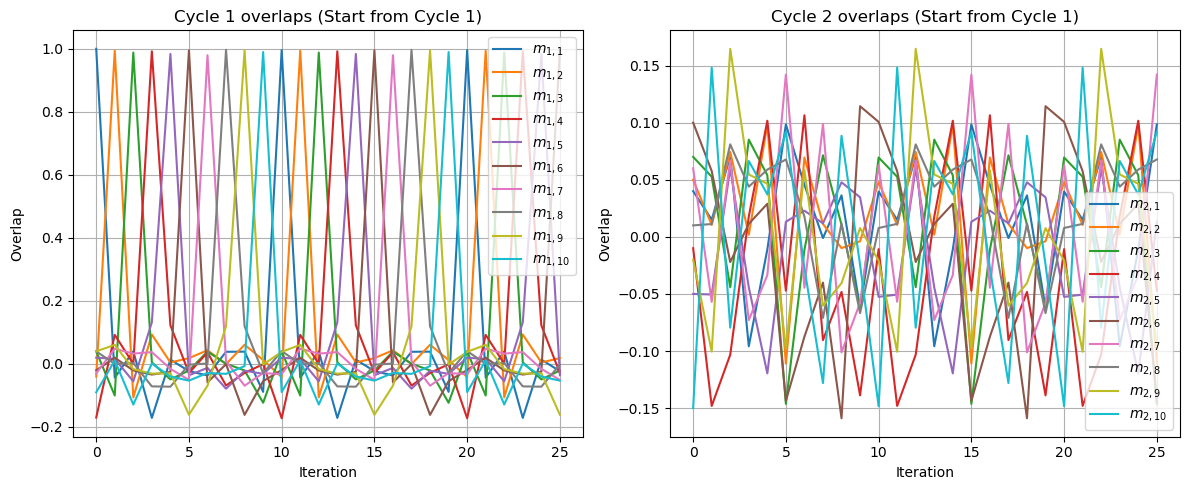

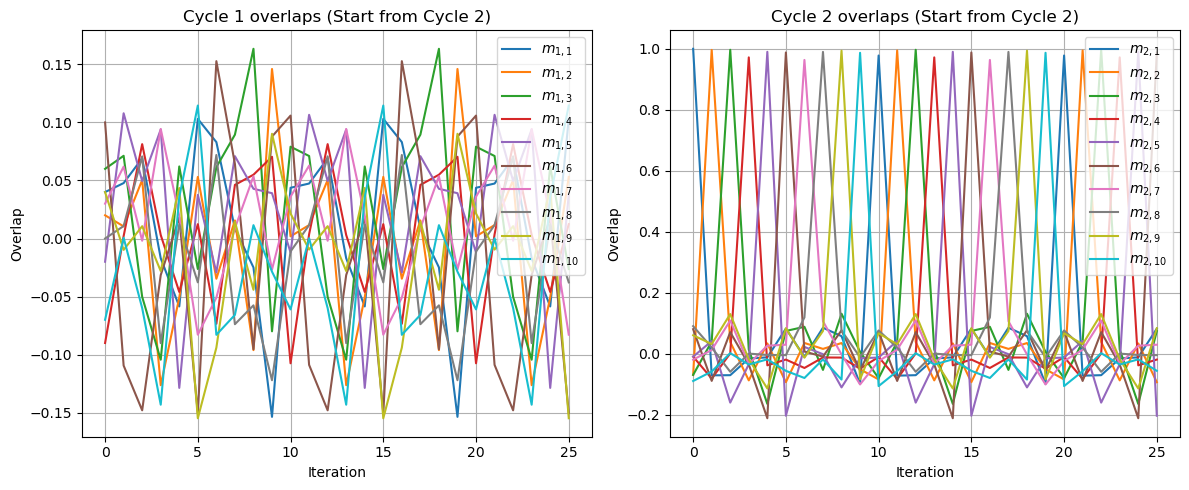

In [9]:
def generate_two_cycles(P, N):
    assert P % 2 == 0, "P must be even to split into two cycles"
    P_half = P // 2
    patterns_cycle1 = np.random.choice([-1, 1], size=(P_half, N))
    patterns_cycle2 = np.random.choice([-1, 1], size=(P_half, N))
    return patterns_cycle1, patterns_cycle2

def build_weight_matrix_dual_cycles(patterns1, patterns2):
    N = patterns1.shape[1]
    P_half = patterns1.shape[0]
    W = np.zeros((N, N))

    # Add contributions from cycle 1
    for mu in range(P_half):
        W += np.outer(patterns1[(mu + 1) % P_half], patterns1[mu])
    
    # Add contributions from cycle 2
    for mu in range(P_half):
        W += np.outer(patterns2[(mu + 1) % P_half], patterns2[mu])
    
    return W / N

def simulate_cycle(patterns1, patterns2, W, init_pattern, beta=4, n_max=20):
    P_half = patterns1.shape[0]
    P = 2 * P_half
    N = patterns1.shape[1]

    S = np.zeros((n_max + 1, N))
    S[0] = init_pattern

    overlaps1 = np.zeros((n_max + 1, P_half))
    overlaps2 = np.zeros((n_max + 1, P_half))

    for mu in range(P_half):
        overlaps1[0, mu] = np.dot(S[0], patterns1[mu]) / N
        overlaps2[0, mu] = np.dot(S[0], patterns2[mu]) / N

    for n in range(1, n_max + 1):
        S[n] = np.tanh(beta * W @ S[n - 1])
        for mu in range(P_half):
            overlaps1[n, mu] = np.dot(S[n], patterns1[mu]) / N
            overlaps2[n, mu] = np.dot(S[n], patterns2[mu]) / N

    return overlaps1, overlaps2

def plot_dual_cycle(overlaps1, overlaps2, label):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for mu in range(overlaps1.shape[1]):
        plt.plot(overlaps1[:, mu], label=f"$m_{{1,{mu+1}}}$")
    plt.title(f"Cycle 1 overlaps ({label})")
    plt.xlabel("Iteration")
    plt.ylabel("Overlap")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for mu in range(overlaps2.shape[1]):
        plt.plot(overlaps2[:, mu], label=f"$m_{{2,{mu+1}}}$")
    plt.title(f"Cycle 2 overlaps ({label})")
    plt.xlabel("Iteration")
    plt.ylabel("Overlap")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
P = 20  # Total patterns (2 cycles of 10)
N = 200  # Neurons
beta = 4
n_max = 25

# Generate and simulate
patterns1, patterns2 = generate_two_cycles(P, N)
W = build_weight_matrix_dual_cycles(patterns1, patterns2)

# Simulate retrieval from pattern in cycle 1
overlaps1_a, overlaps2_a = simulate_cycle(patterns1, patterns2, W, patterns1[0], beta, n_max)
plot_dual_cycle(overlaps1_a, overlaps2_a, label="Start from Cycle 1")

# Simulate retrieval from pattern in cycle 2
overlaps1_b, overlaps2_b = simulate_cycle(patterns1, patterns2, W, patterns2[0], beta, n_max)
plot_dual_cycle(overlaps1_b, overlaps2_b, label="Start from Cycle 2")


<span style="color:#0A74DA">

Answer:

We can see that initialising into a pattern in cycle 1 retrieves cycle 1 (clean cycling behavior) without activating cycle 2 (stay near zero), and vice versa as expected.
This shows that both cycles coexist independently in the network and the system retrieves the correct one based on the initial state.

## Ex 2. Continuous dynamical system

In this section we will be extending the cyclic Hopfield model from Ex. 0 and 1 as a continuous dynamical
system. That is, we will replace the update rule of Eq. (1) defined on discrete time points by a differential
equation defined for continuous time. The state of neuron i will be replaced from the variable S(n) to the i
variable $x_i(t) \in [−1, 1]$, where t denotes time, to differentiate it from the discrete system. The dynamics of neuron i are given by an ordinary differential equation on the state
\begin{equation}
	\tau \frac{dx_i}{dt}(t) = -x_i(t) + \tanh \left( \beta \sum_{j=1}^{N} w_{ij} x_j(t - \tau_{\text{delay}}) \right)
\tag{4}
\end{equation}
where $\tau$ is the time constant of the dynamics and $\tau_{delay}$ is the interaction delay between neurons, and all other parameters are as before. Unless mentioned otherwise, we will use $\beta = 4$, $\tau = 5$ ms and $\Delta t = 0.5$ ms, which is the spacing of time points at which the network will be evaluated. Convince yourself that this equation corresponds to a continuous version of the update rule in Eq. (1).

In this continuous setup we can again define our overlap variables
\begin{equation}
	m^{\mu}(t) = \frac{1}{N} \sum_{i=1}^{N} p_i^{\mu} x_i(t)
\tag{5}
\end{equation}
to help us intuitively understand the dynamics and strongly reduce the computational complexity in the
update step.

**2.1**. Simulate the dynamics of $N = 100$ neurons with minimal synaptic delay ($\tau_{delay} = \Delta t = 0.5$ ms), connected through $P = 10$ patterns for $T = 100$ ms, with initial condition $x_i(0) = p_1^i$ (the first pattern). What do you observe?
**Hints:**
* Write a method that runs the evolution of the neuronal states, according to Eq. (4) and making use of the overlap variables to reduce the computational cost. It should take as an argument the initial state $x_i(t = 0)$, and return the state of all neurons for all time steps. You may assume that the state of the neurons before the start of the simulation is constant ($x_i(t) = x_i(0)$ for $t < 0$).
* Eq. (4) can be integrated directly using the forward Euler method, with discrete time steps $t = t_0, t_1, . . . (t_k = k · \Delta t)$. It gives the following update rule:
\begin{equation}
    x_i(t_{k+1}) = x_i(t_k) + \Delta t \frac{dx_i}{dt}(t_k)
\tag{6}
\end{equation}
* Plot the time evolution of the P overlap variables $m^\mu(t)$ as a function of time in one plot.


**2.2**. Now add synaptic delay to the network by setting $\tau_{delay} = 2 · \tau$ and run the network again. You should now observe cyclic dynamics on the level of overlap variables. Produce a plot similar to that of the previous exercise, and explain intuitively why the synaptic delay is necessary for this cyclic behaviour. Roughly how much time does it take to complete a full cycle in terms of network parameters?

Now that we have a working setup we can again evaluate its properties, such as the cycle capacity as defined in Exercise 1.

**2.3**. Repeat Exercise 1.3 for the continuous model to find its cycle capacity, using $T = 2 · P \tau_{delay}$. Produce a new plot and comment on how your findings compare to those of Exercise 1.
**Hint:** Here too you can implement an early stopping rule similar to Ex. 1.2 to strongly reduce simulation time.

**2.4**. (Bonus) In the classical Hopfield network as covered in the class, there are also fixed points at states in between the patterns (e.g. $x_i^* = \frac{1}{2}(p_1 + . . . + p_M)$), with the stability of the fixed point depending on if the number of patterns used for the state (M) is odd or even. Test if this also holds in the cyclic dynamic Hopfield model from the exercise. (Either three activations in a single cycle, or preferably three cycles of different length simultaneously.)

## Ex 3. Dimensionality analysis